<a href="https://colab.research.google.com/github/OviRata/PMP-2024/blob/main/TemaPeAcasa2_RataOvidiu_Tema10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install pymc

Output()

Output()

ERROR:pymc.stats.convergence:There were 122 divergences after tuning. Increase `target_accept` or reparameterize.


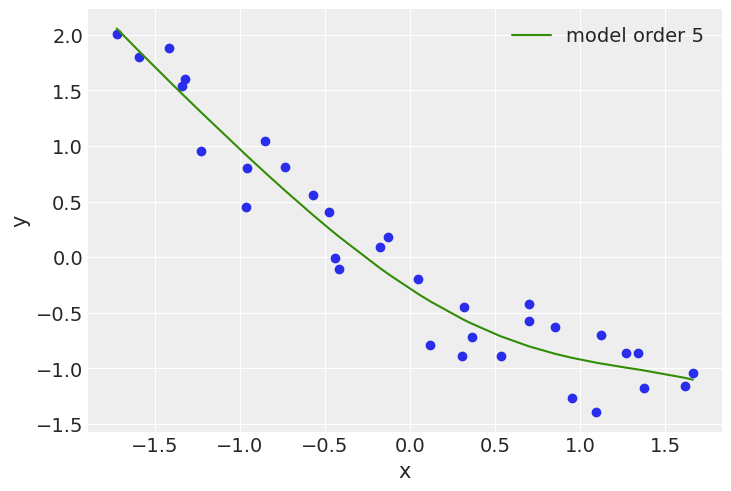

In [2]:
#ex 1
#1
#a)
import pymc as pm
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import arviz as az
az.style.use('arviz-darkgrid')
dummy_data = np.loadtxt('./date.csv')
x_1 = dummy_data[:, 0]
y_1 = dummy_data[:, 1]
order = 5
x_1p = np.vstack([x_1**i for i
in range(1, order+1)])
x_1s = (x_1p - x_1p.mean(axis=1, keepdims=True))/x_1p.std(axis=1, keepdims=True)
y_1s = (y_1 - y_1.mean()) / y_1.std()
plt.scatter(x_1s[0], y_1s)
plt.xlabel('x')
plt.ylabel('y')

with pm.Model() as model_p:
  α = pm.Normal('α', mu=0, sigma=1)
  β = pm.Normal('β', mu=0, sigma=10, shape=order)
  ε = pm.HalfNormal('ε', 5)
  μ = α + pm.math.dot(β, x_1s)
  y_pred = pm.Normal('y_pred', mu=μ, sigma=ε, observed=y_1s)
  idata_p = pm.sample(2000, return_inferencedata=True)


x_new = np.linspace(x_1s[0].min(), x_1s[0].max(), 100)
α_p_post = idata_p.posterior['α'].mean(("chain", "draw")).values
β_p_post = idata_p.posterior['β'].mean(("chain", "draw")).values
idx = np.argsort(x_1s[0])
y_p_post = α_p_post + np.dot(β_p_post, x_1s)
plt.plot(x_1s[0][idx], y_p_post[idx], 'C2', label=f'model order {order}')
plt.scatter(x_1s[0], y_1s, c='C0', marker='.')
plt.legend()

Output()

Output()

ERROR:pymc.stats.convergence:There were 45 divergences after tuning. Increase `target_accept` or reparameterize.


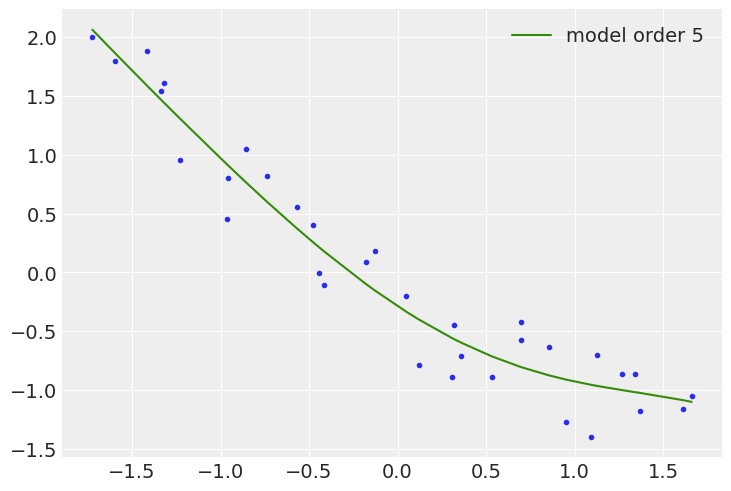

In [4]:

#b)
with pm.Model() as model_p:
  α = pm.Normal('α', mu=0, sigma=1)
  β = pm.Normal('β', mu=0, sigma=10, shape=order)
  ε = pm.HalfNormal('ε', 5)
  μ = α + pm.math.dot(β, x_1s)
  y_pred = pm.Normal('y_pred', mu=μ, sigma=ε, observed=y_1s)
  idata_p = pm.sample(2000, return_inferencedata=True)


x_new = np.linspace(x_1s[0].min(), x_1s[0].max(), 100)
α_p_post = idata_p.posterior['α'].mean(("chain", "draw")).values
β_p_post = idata_p.posterior['β'].mean(("chain", "draw")).values
idx = np.argsort(x_1s[0])
y_p_post = α_p_post + np.dot(β_p_post, x_1s)
plt.plot(x_1s[0][idx], y_p_post[idx], 'C2', label=f'model order {order}')
plt.scatter(x_1s[0], y_1s, c='C0', marker='.')
plt.legend()



Output()

Output()

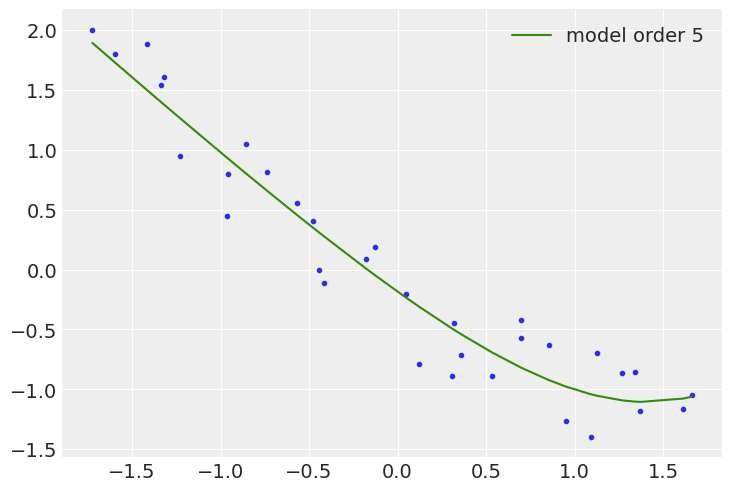

In [5]:
sd = [10, 0.1, 0.1, 0.1, 0.1]
with pm.Model() as model_p:
  α = pm.Normal('α', mu=0, sigma=1)
  β = pm.Normal('β', mu=0, sigma=sd, shape=order)
  ε = pm.HalfNormal('ε', 5)
  μ = α + pm.math.dot(β, x_1s)
  y_pred = pm.Normal('y_pred', mu=μ, sigma=ε, observed=y_1s)
  idata_p = pm.sample(2000, return_inferencedata=True)


x_new = np.linspace(x_1s[0].min(), x_1s[0].max(), 100)
α_p_post = idata_p.posterior['α'].mean(("chain", "draw")).values
β_p_post = idata_p.posterior['β'].mean(("chain", "draw")).values
idx = np.argsort(x_1s[0])
y_p_post = α_p_post + np.dot(β_p_post, x_1s)
plt.plot(x_1s[0][idx], y_p_post[idx], 'C2', label=f'model order {order}')
plt.scatter(x_1s[0], y_1s, c='C0', marker='.')
plt.legend()

Output()

Output()

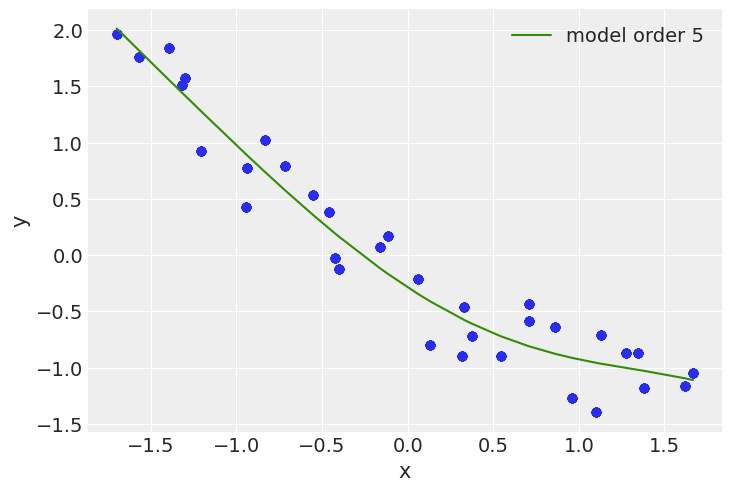

In [11]:
#2
az.style.use('arviz-darkgrid')
dummy_data = np.loadtxt('./date.csv')
x_1 = dummy_data[:, 0]
y_1 = dummy_data[:, 1]

i = 0;
sz = len(x_1);
while( len(x_1)<500 ):
  x_1=np.append(x_1, x_1[i] );
  y_1=np.append( y_1, y_1[i]);
  #print(len(x_1))
  i=i+1;
  i%=sz

order = 5
x_1p = np.vstack([x_1**i for i
in range(1, order+1)])
x_1s = (x_1p - x_1p.mean(axis=1, keepdims=True))/x_1p.std(axis=1, keepdims=True)
y_1s = (y_1 - y_1.mean()) / y_1.std()
plt.scatter(x_1s[0], y_1s)
plt.xlabel('x')
plt.ylabel('y')

with pm.Model() as model_p:
  α = pm.Normal('α', mu=0, sigma=1)
  β = pm.Normal('β', mu=0, sigma=10, shape=order)
  ε = pm.HalfNormal('ε', 5)
  μ = α + pm.math.dot(β, x_1s)
  y_pred = pm.Normal('y_pred', mu=μ, sigma=ε, observed=y_1s)
  idata_p = pm.sample(2000, return_inferencedata=True)


x_new = np.linspace(x_1s[0].min(), x_1s[0].max(), 100)
α_p_post = idata_p.posterior['α'].mean(("chain", "draw")).values
β_p_post = idata_p.posterior['β'].mean(("chain", "draw")).values
idx = np.argsort(x_1s[0])
y_p_post = α_p_post + np.dot(β_p_post, x_1s)
plt.plot(x_1s[0][idx], y_p_post[idx], 'C2', label=f'model order {order}')
plt.scatter(x_1s[0], y_1s, c='C0', marker='.')
plt.legend()

Output()

Output()

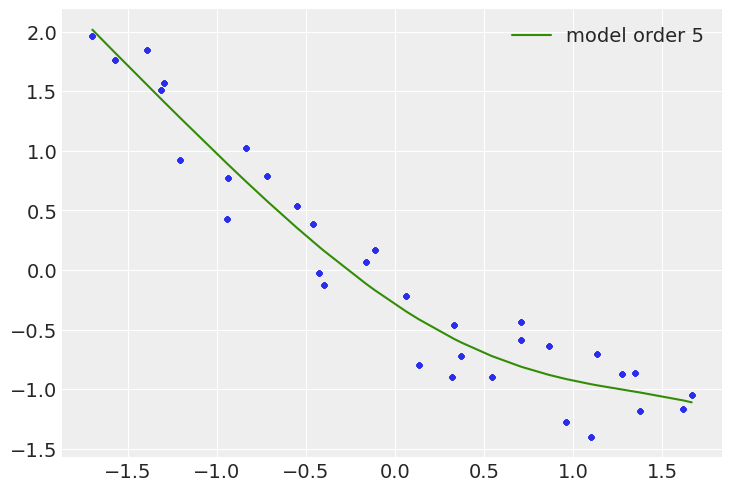

In [12]:
with pm.Model() as model_p:
  α = pm.Normal('α', mu=0, sigma=1)
  β = pm.Normal('β', mu=0, sigma=10, shape=order)
  ε = pm.HalfNormal('ε', 5)
  μ = α + pm.math.dot(β, x_1s)
  y_pred = pm.Normal('y_pred', mu=μ, sigma=ε, observed=y_1s)
  idata_p = pm.sample(2000, return_inferencedata=True)


x_new = np.linspace(x_1s[0].min(), x_1s[0].max(), 100)
α_p_post = idata_p.posterior['α'].mean(("chain", "draw")).values
β_p_post = idata_p.posterior['β'].mean(("chain", "draw")).values
idx = np.argsort(x_1s[0])
y_p_post = α_p_post + np.dot(β_p_post, x_1s)
plt.plot(x_1s[0][idx], y_p_post[idx], 'C2', label=f'model order {order}')
plt.scatter(x_1s[0], y_1s, c='C0', marker='.')
plt.legend()

Output()

Output()

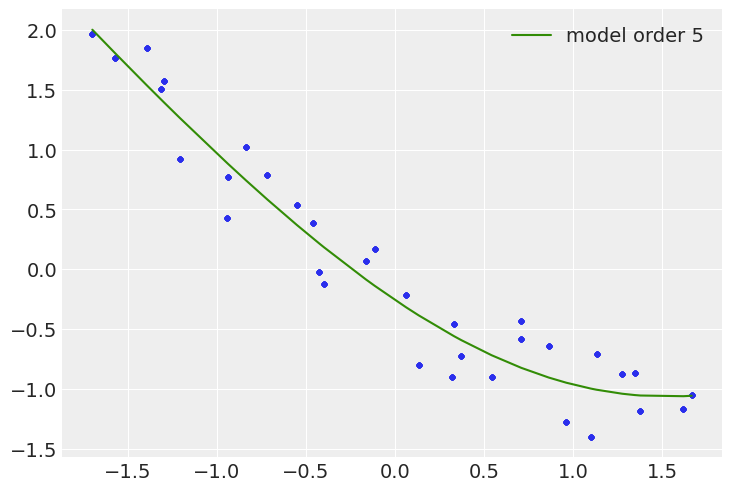

In [13]:
sd = [10, 0.1, 0.1, 0.1, 0.1]
with pm.Model() as model_p:
  α = pm.Normal('α', mu=0, sigma=1)
  β = pm.Normal('β', mu=0, sigma=sd, shape=order)
  ε = pm.HalfNormal('ε', 5)
  μ = α + pm.math.dot(β, x_1s)
  y_pred = pm.Normal('y_pred', mu=μ, sigma=ε, observed=y_1s)
  idata_p = pm.sample(2000, return_inferencedata=True)


x_new = np.linspace(x_1s[0].min(), x_1s[0].max(), 100)
α_p_post = idata_p.posterior['α'].mean(("chain", "draw")).values
β_p_post = idata_p.posterior['β'].mean(("chain", "draw")).values
idx = np.argsort(x_1s[0])
y_p_post = α_p_post + np.dot(β_p_post, x_1s)
plt.plot(x_1s[0][idx], y_p_post[idx], 'C2', label=f'model order {order}')
plt.scatter(x_1s[0], y_1s, c='C0', marker='.')
plt.legend()

Output()

Output()

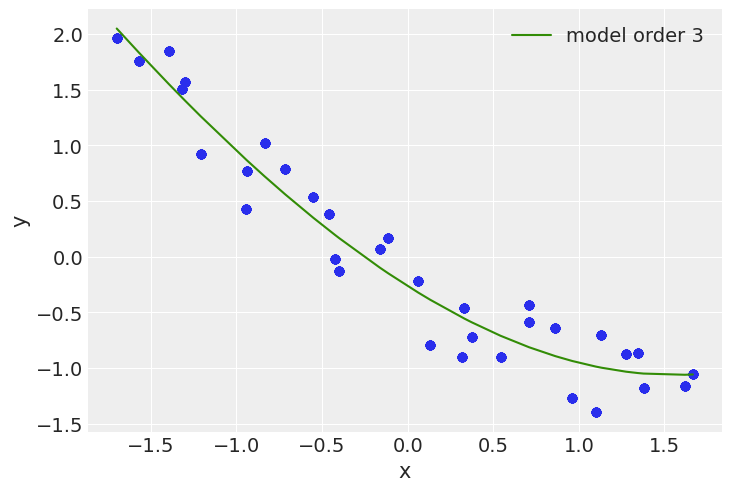

In [14]:
#3
az.style.use('arviz-darkgrid')
dummy_data = np.loadtxt('./date.csv')
x_1 = dummy_data[:, 0]
y_1 = dummy_data[:, 1]

i = 0;
sz = len(x_1);
while( len(x_1)<500 ):
  x_1=np.append(x_1, x_1[i] );
  y_1=np.append( y_1, y_1[i]);
  #print(len(x_1))
  i=i+1;
  i%=sz

order = 3
x_1p = np.vstack([x_1**i for i
in range(1, order+1)])
x_1s = (x_1p - x_1p.mean(axis=1, keepdims=True))/x_1p.std(axis=1, keepdims=True)
y_1s = (y_1 - y_1.mean()) / y_1.std()
plt.scatter(x_1s[0], y_1s)
plt.xlabel('x')
plt.ylabel('y')

with pm.Model() as model_p:
  α = pm.Normal('α', mu=0, sigma=1)
  β = pm.Normal('β', mu=0, sigma=10, shape=order)
  ε = pm.HalfNormal('ε', 5)
  μ = α + pm.math.dot(β, x_1s)
  y_pred = pm.Normal('y_pred', mu=μ, sigma=ε, observed=y_1s)
  idata_p = pm.sample(2000, return_inferencedata=True)


x_new = np.linspace(x_1s[0].min(), x_1s[0].max(), 100)
α_p_post = idata_p.posterior['α'].mean(("chain", "draw")).values
β_p_post = idata_p.posterior['β'].mean(("chain", "draw")).values
idx = np.argsort(x_1s[0])
y_p_post = α_p_post + np.dot(β_p_post, x_1s)
plt.plot(x_1s[0][idx], y_p_post[idx], 'C2', label=f'model order {order}')
plt.scatter(x_1s[0], y_1s, c='C0', marker='.')
plt.legend()

In [15]:
pm.compute_log_likelihood(idata_p ,model=model_p)
waic_p = az.waic(idata_p, scale="deviance")
waic_p

Output()

,0
elpd_waic,20.671459
se,20.104392
p_waic,3.428134
n_samples,4000
n_data_points,500
warning,False
waic_i,[<xarray.DataArray 'waic_i' ()>\narray(-0.8105...
scale,deviance


In [18]:
loo_p = az.loo(idata_p, scale="deviance")
loo_p

,0
elpd_loo,20.682814
se,20.104742
p_loo,3.433812
n_samples,4000
n_data_points,500
warning,False
loo_i,[<xarray.DataArray 'loo_i' ()>\narray(-0.81050...
pareto_k,[<xarray.DataArray 'pareto_shape' ()>\narray(0...
scale,deviance
good_k,0.7


Output()

Output()

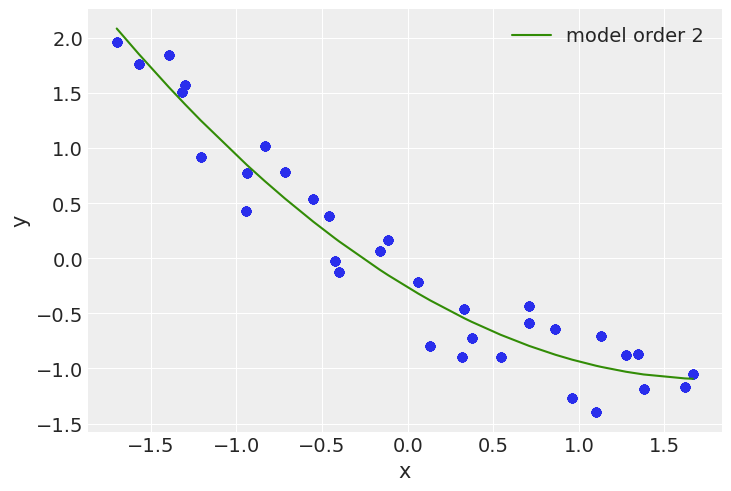

In [32]:


order = 2
x_1p = np.vstack([x_1**i for i
in range(1, order+1)])
x_1s = (x_1p - x_1p.mean(axis=1, keepdims=True))/x_1p.std(axis=1, keepdims=True)
y_1s = (y_1 - y_1.mean()) / y_1.std()
plt.scatter(x_1s[0], y_1s)
plt.xlabel('x')
plt.ylabel('y')

with pm.Model() as model_p:
  α = pm.Normal('α', mu=0, sigma=1)
  β = pm.Normal('β', mu=0, sigma=10, shape=order)
  ε = pm.HalfNormal('ε', 5)
  μ = α + pm.math.dot(β, x_1s)
  y_pred = pm.Normal('y_pred', mu=μ, sigma=ε, observed=y_1s)
  idata_p = pm.sample(2000, return_inferencedata=True)


x_new = np.linspace(x_1s[0].min(), x_1s[0].max(), 100)
α_p_post = idata_p.posterior['α'].mean(("chain", "draw")).values
β_p_post = idata_p.posterior['β'].mean(("chain", "draw")).values
idx = np.argsort(x_1s[0])
y_p_post = α_p_post + np.dot(β_p_post, x_1s)
plt.plot(x_1s[0][idx], y_p_post[idx], 'C2', label=f'model order {order}')
plt.scatter(x_1s[0], y_1s, c='C0', marker='.')
plt.legend()

In [27]:
pm.compute_log_likelihood(idata_p ,model=model_p)
waic_p = az.waic(idata_p, scale="deviance")
waic_p

Output()

,0
elpd_waic,21.095385
se,19.740656
p_waic,2.664044
n_samples,4000
n_data_points,500
warning,False
waic_i,[<xarray.DataArray 'waic_i' ()>\narray(-0.6860...
scale,deviance


In [28]:
loo_p = az.loo(idata_p, scale="deviance")
loo_p

,0
elpd_loo,21.102448
se,19.740847
p_loo,2.667576
n_samples,4000
n_data_points,500
warning,False
loo_i,[<xarray.DataArray 'loo_i' ()>\narray(-0.68604...
pareto_k,[<xarray.DataArray 'pareto_shape' ()>\narray(0...
scale,deviance
good_k,0.7


Output()

Output()

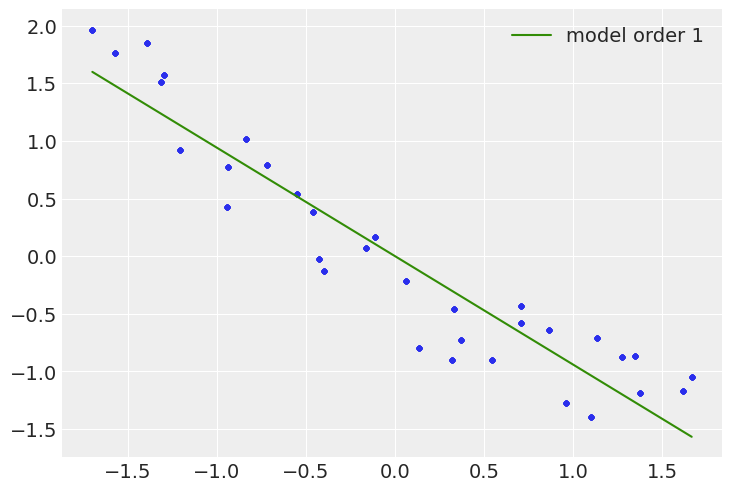

In [29]:

order = 1
x_1p = np.vstack([x_1**i for i
in range(1, order+1)])
x_1s = (x_1p - x_1p.mean(axis=1, keepdims=True))/x_1p.std(axis=1, keepdims=True)
y_1s = (y_1 - y_1.mean()) / y_1.std()
plt.scatter(x_1s[0], y_1s)
plt.xlabel('x')
plt.ylabel('y')

with pm.Model() as model_p:
  α = pm.Normal('α', mu=0, sigma=1)
  β = pm.Normal('β', mu=0, sigma=10, shape=order)
  ε = pm.HalfNormal('ε', 5)
  μ = α + pm.math.dot(β, x_1s)
  y_pred = pm.Normal('y_pred', mu=μ, sigma=ε, observed=y_1s)
  idata_p = pm.sample(2000, return_inferencedata=True)


x_new = np.linspace(x_1s[0].min(), x_1s[0].max(), 100)
α_p_post = idata_p.posterior['α'].mean(("chain", "draw")).values
β_p_post = idata_p.posterior['β'].mean(("chain", "draw")).values
idx = np.argsort(x_1s[0])
y_p_post = α_p_post + np.dot(β_p_post, x_1s)
plt.plot(x_1s[0][idx], y_p_post[idx], 'C2', label=f'model order {order}')
plt.scatter(x_1s[0], y_1s, c='C0', marker='.')
plt.legend()

In [30]:
pm.compute_log_likelihood(idata_p ,model=model_p)
waic_p = az.waic(idata_p, scale="deviance")
waic_p

Output()

,0
elpd_waic,341.651501
se,21.165412
p_waic,2.549701
n_samples,4000
n_data_points,500
warning,False
waic_i,[<xarray.DataArray 'waic_i' ()>\narray(0.85783...
scale,deviance


In [31]:
loo_p = az.loo(idata_p, scale="deviance")
loo_p

,0
elpd_loo,341.660031
se,21.165763
p_loo,2.553966
n_samples,4000
n_data_points,500
warning,False
loo_i,[<xarray.DataArray 'loo_i' ()>\narray(0.857858...
pareto_k,[<xarray.DataArray 'pareto_shape' ()>\narray(0...
scale,deviance
good_k,0.7


Modelul liniar este mai bun. Un argument ar fi faptul ca valorile waic si loo sunt mai mici.



Output()

Output()

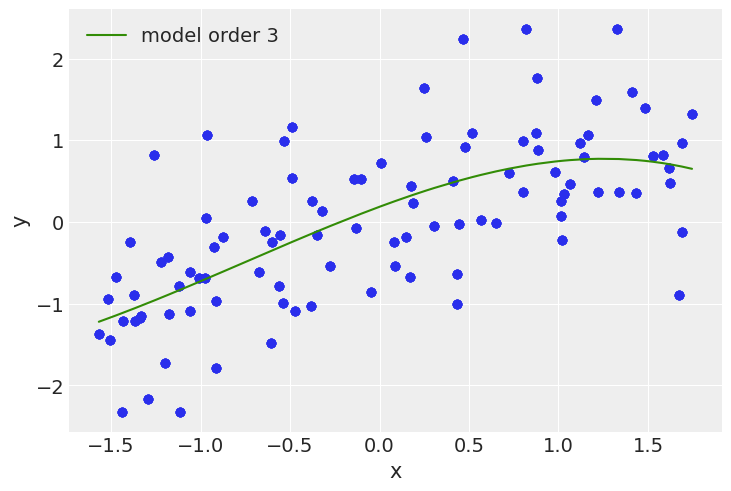

In [52]:
#ex2
az.style.use('arviz-darkgrid')
dummy_data = np.loadtxt('./date_studiu_nota.csv', dtype='str', skiprows=1)
x_1 = [];
y_1 = [];

for x in dummy_data:
  arr = x.split(',');
  arr[0]=arr[0].replace('"', '');
  arr[1]=arr[1].replace('"', '');
  x_1.append( float(arr[0]) );
  y_1.append( float(arr[1]) );

i = 0;
sz = len(x_1);
while( len(x_1)<500 ):
  x_1=np.append(x_1, x_1[i] );
  y_1=np.append( y_1, y_1[i]);
  #print(len(x_1))
  i=i+1;
  i%=sz

order = 3
x_1p = np.vstack([x_1**i for i
in range(1, order+1)])
x_1s = (x_1p - x_1p.mean(axis=1, keepdims=True))/x_1p.std(axis=1, keepdims=True)
y_1s = (y_1 - y_1.mean()) / y_1.std()
plt.scatter(x_1s[0], y_1s)
plt.xlabel('x')
plt.ylabel('y')

with pm.Model() as model_p:
  α = pm.Normal('α', mu=0, sigma=1)
  β = pm.Normal('β', mu=0, sigma=10, shape=order)
  ε = pm.HalfNormal('ε', 5)
  μ = α + pm.math.dot(β, x_1s)
  y_pred = pm.Normal('y_pred', mu=μ, sigma=ε, observed=y_1s)
  idata_p = pm.sample(2000, return_inferencedata=True)


x_new = np.linspace(x_1s[0].min(), x_1s[0].max(), 100)
α_p_post = idata_p.posterior['α'].mean(("chain", "draw")).values
β_p_post = idata_p.posterior['β'].mean(("chain", "draw")).values
idx = np.argsort(x_1s[0])
y_p_post = α_p_post + np.dot(β_p_post, x_1s)
plt.plot(x_1s[0][idx], y_p_post[idx], 'C2', label=f'model order {order}')
plt.scatter(x_1s[0], y_1s, c='C0', marker='.')
plt.legend()

In [53]:
pm.compute_log_likelihood(idata_p ,model=model_p)
waic_p = az.waic(idata_p, scale="deviance")
waic_p

Output()

,0
elpd_waic,1116.468816
se,32.12466
p_waic,4.668067
n_samples,4000
n_data_points,500
warning,False
waic_i,[<xarray.DataArray 'waic_i' ()>\narray(1.32903...
scale,deviance


In [54]:
loo_p = az.loo(idata_p, scale="deviance")
loo_p

,0
elpd_loo,1116.482455
se,32.125402
p_loo,4.674887
n_samples,4000
n_data_points,500
warning,False
loo_i,[<xarray.DataArray 'loo_i' ()>\narray(1.329035...
pareto_k,[<xarray.DataArray 'pareto_shape' ()>\narray(-...
scale,deviance
good_k,0.7


Output()

Output()

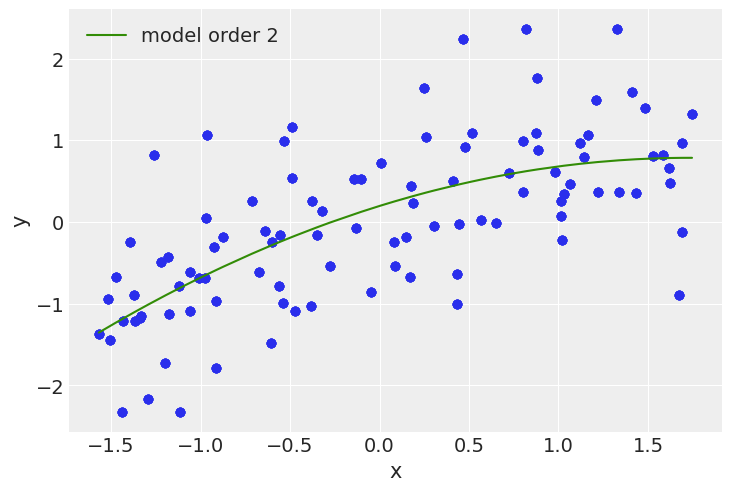

In [55]:

order = 2
x_1p = np.vstack([x_1**i for i
in range(1, order+1)])
x_1s = (x_1p - x_1p.mean(axis=1, keepdims=True))/x_1p.std(axis=1, keepdims=True)
y_1s = (y_1 - y_1.mean()) / y_1.std()
plt.scatter(x_1s[0], y_1s)
plt.xlabel('x')
plt.ylabel('y')

with pm.Model() as model_p:
  α = pm.Normal('α', mu=0, sigma=1)
  β = pm.Normal('β', mu=0, sigma=10, shape=order)
  ε = pm.HalfNormal('ε', 5)
  μ = α + pm.math.dot(β, x_1s)
  y_pred = pm.Normal('y_pred', mu=μ, sigma=ε, observed=y_1s)
  idata_p = pm.sample(2000, return_inferencedata=True)


x_new = np.linspace(x_1s[0].min(), x_1s[0].max(), 100)
α_p_post = idata_p.posterior['α'].mean(("chain", "draw")).values
β_p_post = idata_p.posterior['β'].mean(("chain", "draw")).values
idx = np.argsort(x_1s[0])
y_p_post = α_p_post + np.dot(β_p_post, x_1s)
plt.plot(x_1s[0][idx], y_p_post[idx], 'C2', label=f'model order {order}')
plt.scatter(x_1s[0], y_1s, c='C0', marker='.')
plt.legend()

In [56]:
pm.compute_log_likelihood(idata_p ,model=model_p)
waic_p = az.waic(idata_p, scale="deviance")
waic_p

Output()

,0
elpd_waic,1117.965932
se,32.73126
p_waic,3.96953
n_samples,4000
n_data_points,500
warning,False
waic_i,[<xarray.DataArray 'waic_i' ()>\narray(1.29343...
scale,deviance


In [57]:
loo_p = az.loo(idata_p, scale="deviance")
loo_p

,0
elpd_loo,1117.976829
se,32.731907
p_loo,3.974978
n_samples,4000
n_data_points,500
warning,False
loo_i,[<xarray.DataArray 'loo_i' ()>\narray(1.293439...
pareto_k,[<xarray.DataArray 'pareto_shape' ()>\narray(-...
scale,deviance
good_k,0.7


Output()

Output()

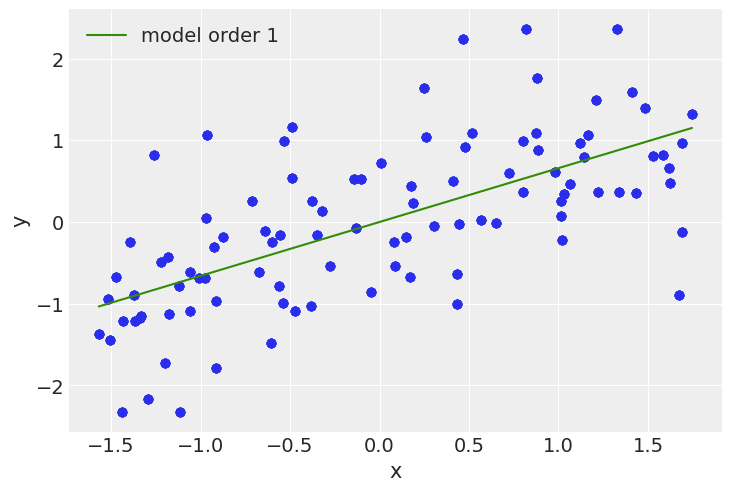

In [58]:

order = 1
x_1p = np.vstack([x_1**i for i
in range(1, order+1)])
x_1s = (x_1p - x_1p.mean(axis=1, keepdims=True))/x_1p.std(axis=1, keepdims=True)
y_1s = (y_1 - y_1.mean()) / y_1.std()
plt.scatter(x_1s[0], y_1s)
plt.xlabel('x')
plt.ylabel('y')

with pm.Model() as model_p:
  α = pm.Normal('α', mu=0, sigma=1)
  β = pm.Normal('β', mu=0, sigma=10, shape=order)
  ε = pm.HalfNormal('ε', 5)
  μ = α + pm.math.dot(β, x_1s)
  y_pred = pm.Normal('y_pred', mu=μ, sigma=ε, observed=y_1s)
  idata_p = pm.sample(2000, return_inferencedata=True)


x_new = np.linspace(x_1s[0].min(), x_1s[0].max(), 100)
α_p_post = idata_p.posterior['α'].mean(("chain", "draw")).values
β_p_post = idata_p.posterior['β'].mean(("chain", "draw")).values
idx = np.argsort(x_1s[0])
y_p_post = α_p_post + np.dot(β_p_post, x_1s)
plt.plot(x_1s[0][idx], y_p_post[idx], 'C2', label=f'model order {order}')
plt.scatter(x_1s[0], y_1s, c='C0', marker='.')
plt.legend()

In [59]:
pm.compute_log_likelihood(idata_p ,model=model_p)
waic_p = az.waic(idata_p, scale="deviance")
waic_p

Output()

,0
elpd_waic,1140.630144
se,34.090685
p_waic,3.110572
n_samples,4000
n_data_points,500
warning,False
waic_i,[<xarray.DataArray 'waic_i' ()>\narray(1.49226...
scale,deviance


In [60]:
loo_p = az.loo(idata_p, scale="deviance")
loo_p

,0
elpd_loo,1140.639304
se,34.091495
p_loo,3.115152
n_samples,4000
n_data_points,500
warning,False
loo_i,[<xarray.DataArray 'loo_i' ()>\narray(1.492266...
pareto_k,[<xarray.DataArray 'pareto_shape' ()>\narray(0...
scale,deviance
good_k,0.7


Modelul liniar este mai bun. Un argument ar fi faptul ca valorile waic si loo sunt mai mici.